## Data Exploration

This script illustrates how to load, visualize the data and perform some basic exploratory data analysis.

In [13]:
import numpy as np
import fncs_helper as fncs
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

import json
with open('Settings.json') as f:
    d = json.load(f)
    dataFolder = d['dataFolder']

### Analyzing Data over a Single Trial

Loading the data.

In [14]:
xt, xv, yt, yv = fncs.loadTrial_Train(dataFolder+'Train/',id=1)


Plotting the measurements and labels.

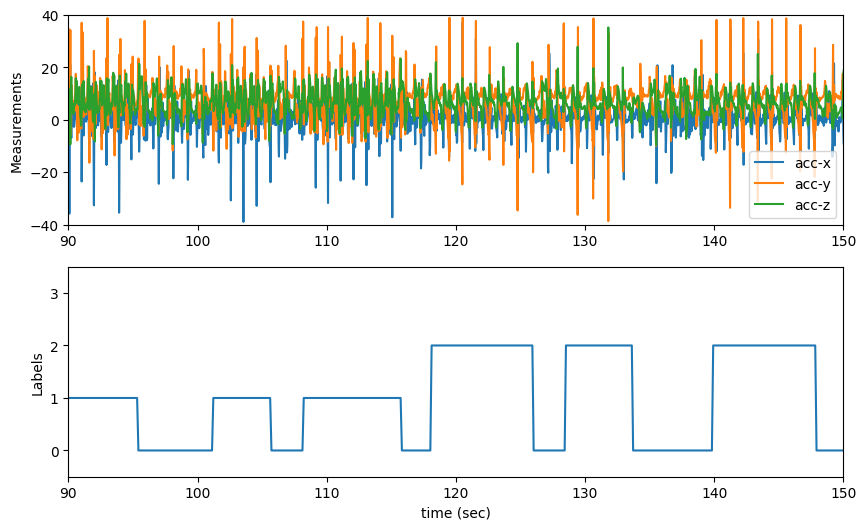

Labels include the following Locomotion Modes:
(0) Standing / Walking Hard Terrain
(1) Climbing Down Stairs
(2) Climbing Up Stairs
(3) Walking Soft Terrain


In [15]:
# Specifying a window of time for display
t_min = 90
t_max = 150

# Plotting the data
fig, (ax1,ax2) = plt.subplots(2,1)
fig.set_size_inches(10,6)

ax1.plot(xt,xv[:,0:3])
ax1.axis([t_min,t_max,-40,40])
ax1.set_ylabel('Measurements')
ax1.legend(['acc-x','acc-y','acc-z'])

ax2.plot(yt,yv)
ax2.axis([t_min,t_max,-0.5,3.5])
ax2.set_xlabel('time (sec)')
ax2.set_ylabel('Labels')

plt.show()

# Displaying the labels
print('Labels include the following Locomotion Modes:')
print('(0) Standing / Walking Hard Terrain')
print('(1) Climbing Down Stairs')
print('(2) Climbing Up Stairs')
print('(3) Walking Soft Terrain')


Compute the mean and standard deviation of the period between samples to make sure that they match with the description.

In [16]:
dxt = np.diff(xt)
print('Timestamps for x: Mean = {:5.3f} seconds | Std = {:5.3f}'.format(np.mean(dxt),np.std(dxt)))

dyt = np.diff(yt)
print('Timestamps for y: Mean = {:5.3f} seconds | Std = {:5.3f}'.format(np.mean(dyt),np.std(dyt)))

Timestamps for x: Mean = 0.025 seconds | Std = 0.000
Timestamps for y: Mean = 0.100 seconds | Std = 0.000


Displaying the histogram of labels. Not that this distribution is imbalanced. You may need to consider techniques for handling this during your model selection.

In [17]:
# 'yCounts' should be a list with 4 entries containing the counts for each class from 'yv'.
yCounts = []

yCounts, bin_edges = np.histogram(yv, bins=[-0.5,0.5,1.5,2.5,3.5])

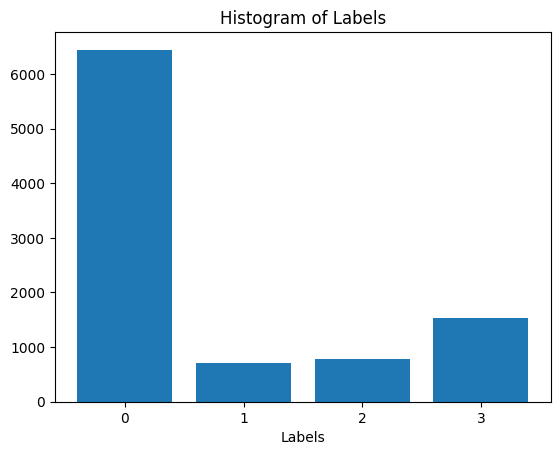

In [18]:
# Plottinng the counts
plt.bar([0,1,2,3],yCounts)
plt.xticks([0,1,2,3])
plt.xlabel('Labels')
plt.title('Histogram of Labels')
plt.show()

Extracting some hand-crafted features and displaying a correlogram of these values.

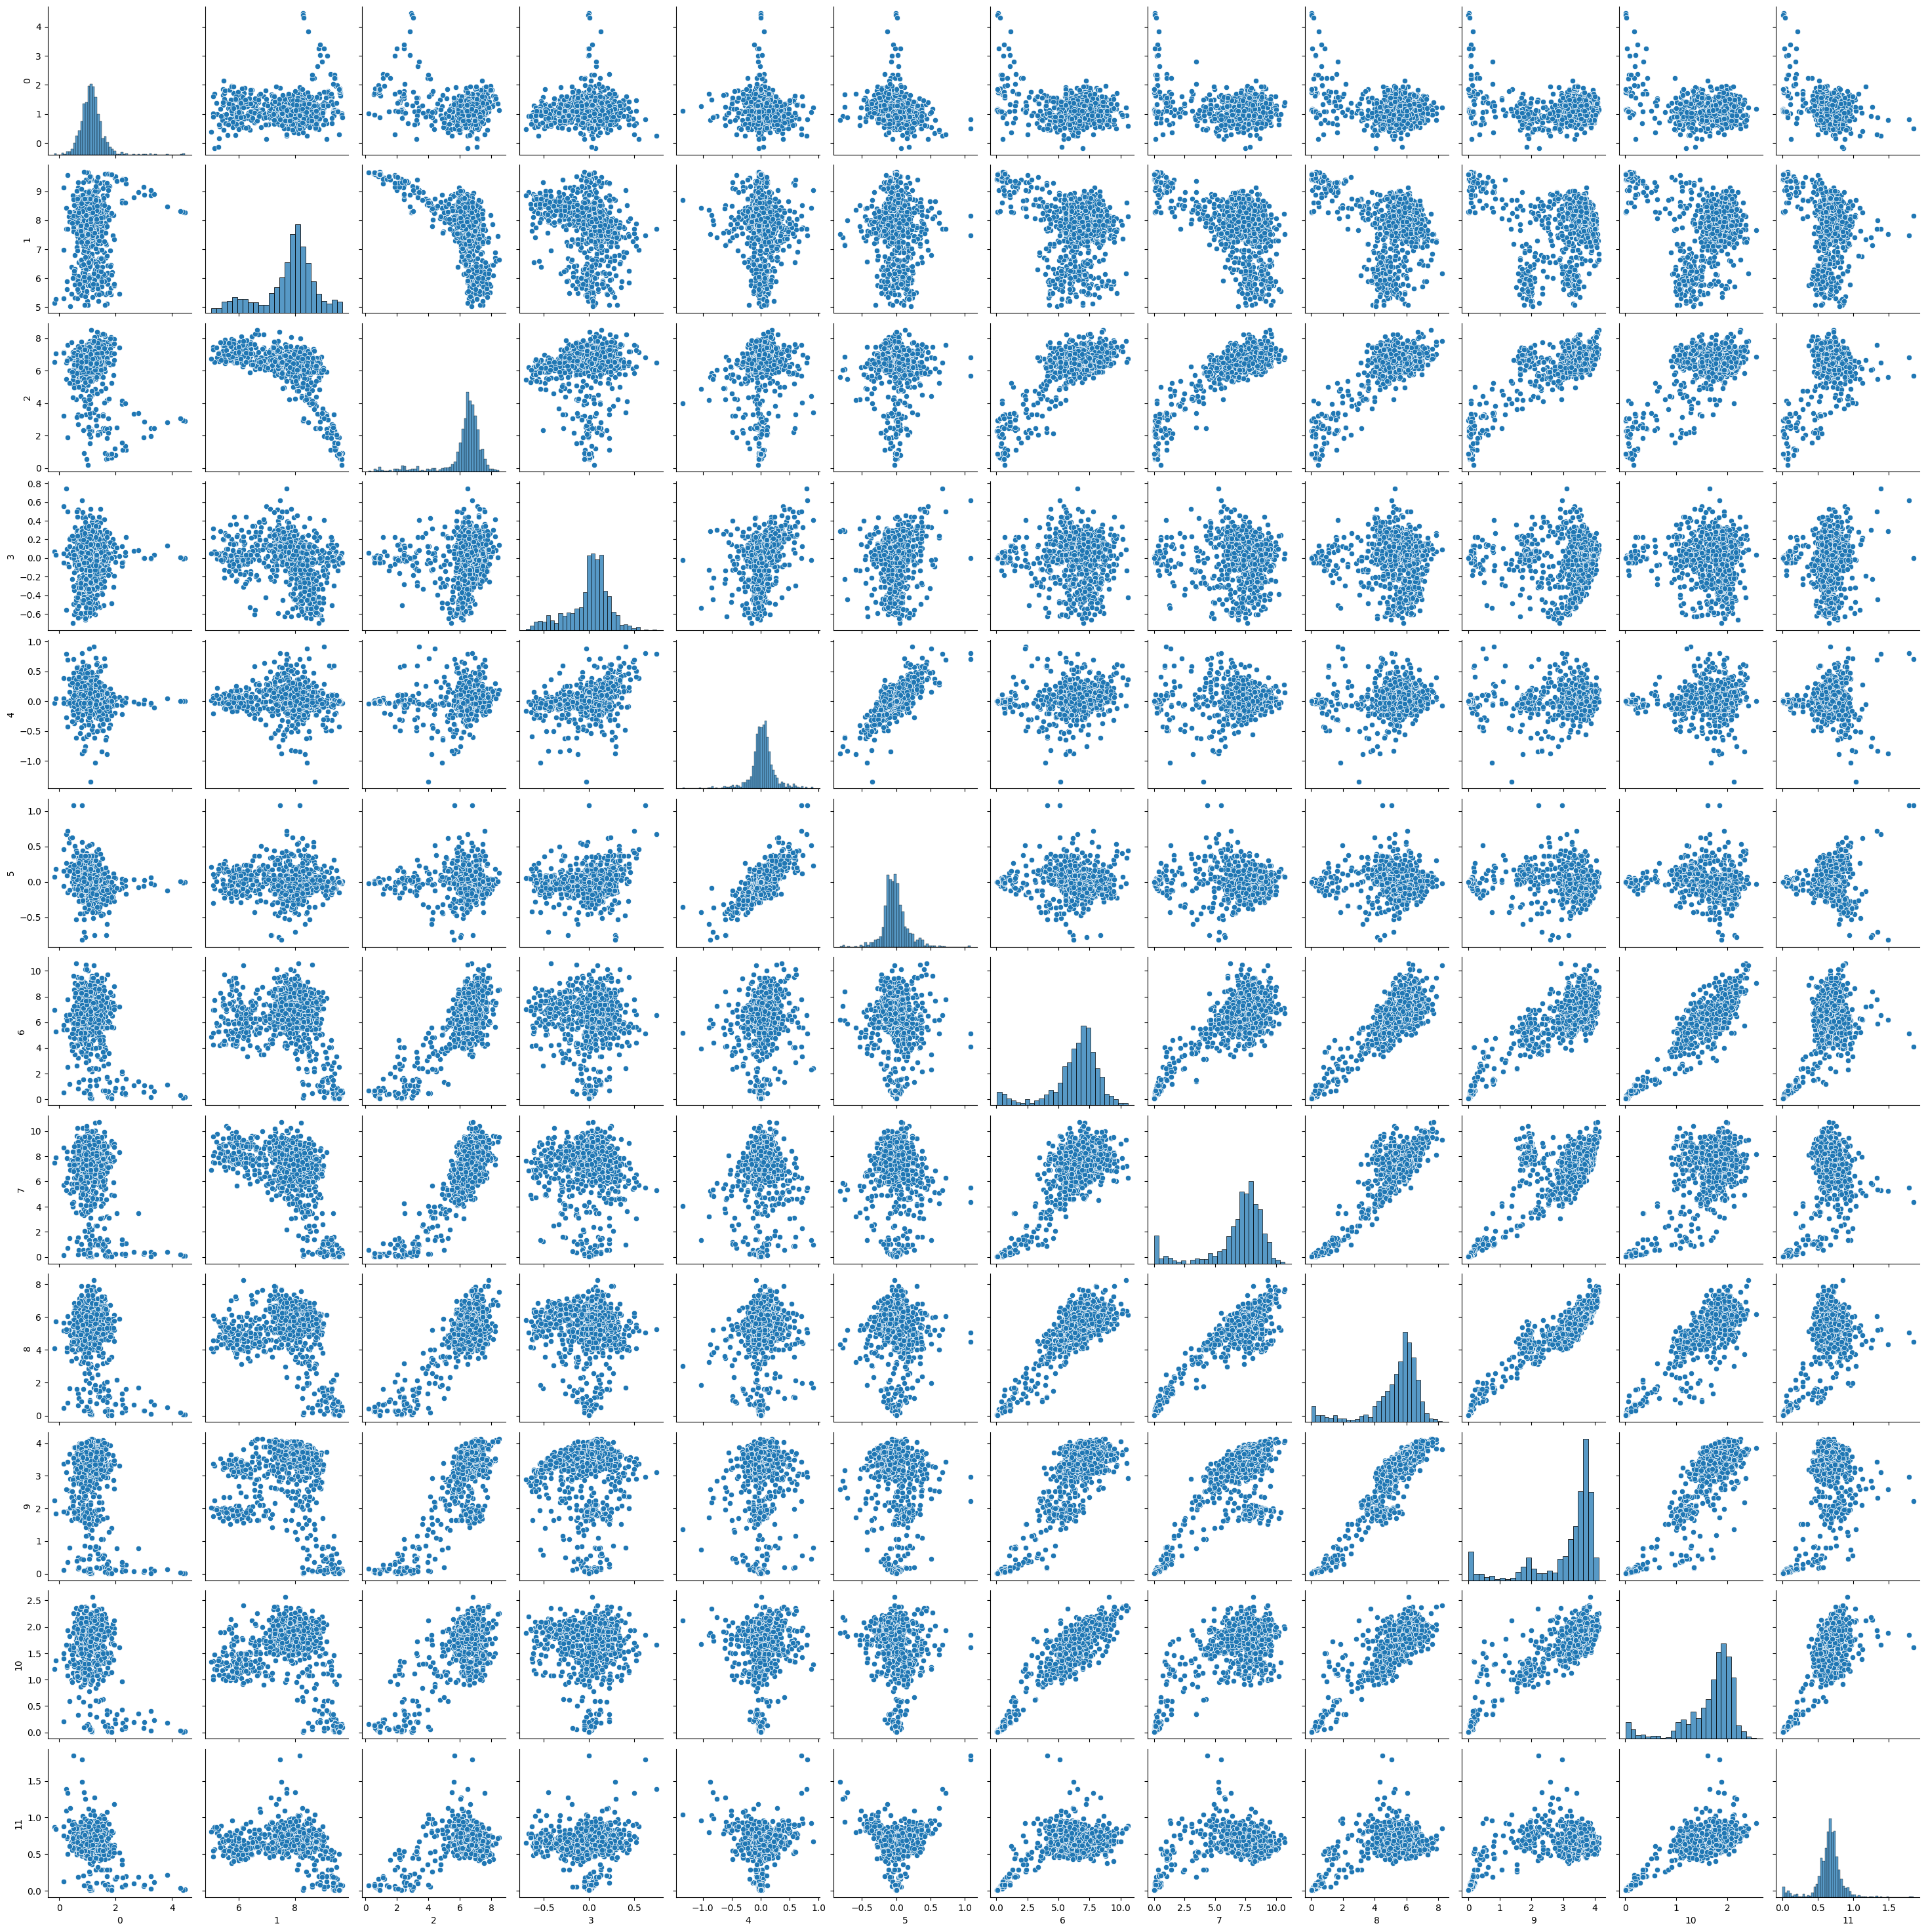

In [20]:
# Specifying some parameters for the feature extraction
timeStart = np.min(xt) # Starting time for the first window
timeEnd = np.max(xt) # The windows cannot go beyond the end time
timeStep = 1 # The step size used to shift the windows
winSz = 2 # The size of a window for feature extraction

# Getting the features
tList,featList = fncs.extractFeat(xt,xv,winSz,timeStart,timeEnd,timeStep)

# Displaying a correlogram
import seaborn as sns
import pandas as pd
sns.pairplot(pd.DataFrame(featList))
plt.show()


It can be observed that some of the features seem to be fairly correlated. This could be used to for feature selection if needed. Also, the range of the values have a different of a factor over 10 in some cases, which may indicate the need for feature normalization.

### Analyzing Data over Entire Dataset

We extract summaries for each one of the features.

In [ ]:
# Specifying some parameters for the feature extraction
timeStep = 1
winSz = 2

for id in range(25):
    # Loading data and extracting features
    xt, xv, yt, yv = fncs.loadTrial_Train(dataFolder+'Train/',id=id+1)
    timeStart = np.min(xt)
    timeEnd = np.max(xt)
    tList,featList = fncs.extractFeat(xt,xv,winSz,timeStart,timeEnd,timeStep)

    # Extracting some summaries
    yCounts, bin_edges = np.histogram(yv, bins=[-0.5,0.5,1.5,2.5,3.5])

    # Storing values for analysis
    if(id==0):
        ySummary = np.array([yCounts/sum(yCounts)])
        featSummary = np.array([np.mean(featList,axis=0)])
    else:
        ySummary = np.concatenate((ySummary,np.array([yCounts/sum(yCounts)])),axis=0)
        featSummary = np.concatenate((featSummary,np.array([np.mean(featList,axis=0)])),axis=0)



Plotting the distribution of the per-trial frequencies of labels.

In [ ]:
plt.boxplot(ySummary)
plt.xticks([1,2,3,4],[0,1,2,3])
plt.show()

Plotting the distribution of the average (over trial) features.

In [ ]:
# We are normalizing over

plt.boxplot(featSummary)
plt.show()

From these plots, we observe that there is some variability on the distributions but overall consistent trends.